# Análise Exploratória de Dados de E-commerce

Este notebook realiza uma análise exploratória inicial dos dados de e-commerce da Olist, explorando as características básicas dos dados, distribuições e relações entre variáveis.

## Importação de Bibliotecas

In [2]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

## Carregamento dos Dados

Nesta seção, carregamos os dados do dataset brasileiro de e-commerce da Olist. 

**Nota:** Para executar este notebook, você precisa baixar os dados do [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) e salvá-los na pasta `data/raw/`.

In [3]:
# Carregando os dados
# Para fins de demonstração, usaremos dados de exemplo incluídos no repositório
# Em um cenário real, você baixaria os dados completos do Kaggle

# Verificando se os arquivos existem
data_files = [
    '../data/raw/olist_customers_dataset.csv',
    '../data/raw/olist_order_items_dataset.csv',
    '../data/raw/olist_orders_dataset.csv',
    '../data/raw/olist_products_dataset.csv',
    '../data/raw/olist_sellers_dataset.csv'
]

# Criando dados de exemplo se os arquivos não existirem
if not all(os.path.exists(file) for file in data_files):
    print("Criando dados de exemplo para demonstração...")
    
    # Criando diretório se não existir
    os.makedirs('../data/raw', exist_ok=True)
    
    # Dados de exemplo - Clientes
    customers_data = {
        'customer_id': [f'cust_{i}' for i in range(1, 101)],
        'customer_unique_id': [f'uniq_{i}' for i in range(1, 101)],
        'customer_zip_code_prefix': np.random.randint(10000, 99999, 100),
        'customer_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Brasília'], 100),
        'customer_state': np.random.choice(['SP', 'RJ', 'MG', 'RS', 'DF'], 100)
    }
    pd.DataFrame(customers_data).to_csv('../data/raw/olist_customers_dataset.csv', index=False)
    
    # Dados de exemplo - Pedidos
    orders_data = {
        'order_id': [f'order_{i}' for i in range(1, 201)],
        'customer_id': np.random.choice([f'cust_{i}' for i in range(1, 101)], 200),
        'order_status': np.random.choice(['delivered', 'shipped', 'processing', 'canceled'], 200, p=[0.7, 0.1, 0.1, 0.1]),
        'order_purchase_timestamp': pd.date_range(start='2022-01-01', end='2022-12-31', periods=200).astype(str),
        'order_approved_at': pd.date_range(start='2022-01-01', end='2022-12-31', periods=200).astype(str),
        'order_delivered_carrier_date': pd.date_range(start='2022-01-02', end='2023-01-01', periods=200).astype(str),
        'order_delivered_customer_date': pd.date_range(start='2022-01-05', end='2023-01-05', periods=200).astype(str),
        'order_estimated_delivery_date': pd.date_range(start='2022-01-10', end='2023-01-10', periods=200).astype(str)
    }
    pd.DataFrame(orders_data).to_csv('../data/raw/olist_orders_dataset.csv', index=False)
    
    # Dados de exemplo - Produtos
    products_data = {
        'product_id': [f'prod_{i}' for i in range(1, 151)],
        'product_category_name': np.random.choice(['electronics', 'furniture', 'toys', 'books', 'clothing'], 150),
        'product_name_length': np.random.randint(10, 100, 150),
        'product_description_length': np.random.randint(100, 1000, 150),
        'product_photos_qty': np.random.randint(1, 10, 150),
        'product_weight_g': np.random.randint(100, 10000, 150),
        'product_length_cm': np.random.randint(10, 100, 150),
        'product_height_cm': np.random.randint(5, 50, 150),
        'product_width_cm': np.random.randint(5, 50, 150)
    }
    pd.DataFrame(products_data).to_csv('../data/raw/olist_products_dataset.csv', index=False)
    
    # Dados de exemplo - Itens de Pedido
    order_items_data = {
        'order_id': np.random.choice([f'order_{i}' for i in range(1, 201)], 300),
        'order_item_id': np.random.randint(1, 5, 300),
        'product_id': np.random.choice([f'prod_{i}' for i in range(1, 151)], 300),
        'seller_id': np.random.choice([f'seller_{i}' for i in range(1, 51)], 300),
        'shipping_limit_date': pd.date_range(start='2022-01-01', end='2022-12-31', periods=300).astype(str),
        'price': np.random.uniform(10, 1000, 300).round(2),
        'freight_value': np.random.uniform(5, 100, 300).round(2)
    }
    pd.DataFrame(order_items_data).to_csv('../data/raw/olist_order_items_dataset.csv', index=False)
    
    # Dados de exemplo - Vendedores
    sellers_data = {
        'seller_id': [f'seller_{i}' for i in range(1, 51)],
        'seller_zip_code_prefix': np.random.randint(10000, 99999, 50),
        'seller_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'], 50),
        'seller_state': np.random.choice(['SP', 'RJ', 'MG', 'PR', 'BA'], 50)
    }
    pd.DataFrame(sellers_data).to_csv('../data/raw/olist_sellers_dataset.csv', index=False)
    
    print("Dados de exemplo criados com sucesso!")

# Carregando os dados
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
sellers = pd.read_csv('../data/raw/olist_sellers_dataset.csv')

## Exploração Inicial dos Dados

In [4]:
# Explorando os dados
print(f"Número de pedidos: {len(orders)}")
print(f"Número de clientes: {len(customers)}")
print(f"Número de produtos: {len(products)}")
print(f"Número de vendedores: {len(sellers)}")

Número de pedidos: 200
Número de clientes: 100
Número de produtos: 150
Número de vendedores: 50


In [5]:
# Verificando valores ausentes
missing_values = pd.DataFrame({
    'Missing Values': [orders.isnull().sum().sum(),
                      order_items.isnull().sum().sum(),
                      products.isnull().sum().sum(),
                      customers.isnull().sum().sum(),
                      sellers.isnull().sum().sum()],
    'Percentage': [orders.isnull().sum().sum() / np.product(orders.shape) * 100,
                  order_items.isnull().sum().sum() / np.product(order_items.shape) * 100,
                  products.isnull().sum().sum() / np.product(products.shape) * 100,
                  customers.isnull().sum().sum() / np.product(customers.shape) * 100,
                  sellers.isnull().sum().sum() / np.product(sellers.shape) * 100]
}, index=['orders', 'order_items', 'products', 'customers', 'sellers'])

print(missing_values)

AttributeError: module 'numpy' has no attribute 'product'

## Preparação dos Dados

In [ ]:
# Convertendo colunas de data para datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Análise temporal básica
orders['purchase_year'] = orders['order_purchase_timestamp'].dt.year
orders['purchase_month'] = orders['order_purchase_timestamp'].dt.month
orders['purchase_day'] = orders['order_purchase_timestamp'].dt.day
orders['purchase_dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek

# Verificando as colunas adicionadas
orders[['order_purchase_timestamp', 'purchase_year', 'purchase_month', 'purchase_day', 'purchase_dayofweek']].head()

## Análise Temporal de Pedidos

In [6]:
# Visualizando distribuição de pedidos por mês
plt.figure(figsize=(12, 6))
monthly_orders = orders['purchase_month'].value_counts().sort_index()
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='viridis')
plt.title('Distribuição de Pedidos por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Criando diretório para figuras se não existir
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/orders_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'purchase_month'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Visualizando distribuição de pedidos por dia da semana
plt.figure(figsize=(12, 6))
weekday_orders = orders['purchase_dayofweek'].value_counts().sort_index()
sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette='viridis')
plt.title('Distribuição de Pedidos por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.savefig('../reports/figures/orders_by_weekday.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Status dos Pedidos

C:\Users\Douglas\AppData\Local\Temp\ipykernel_3556\2264679852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=status_counts.index, x=status_counts.values, palette='viridis')


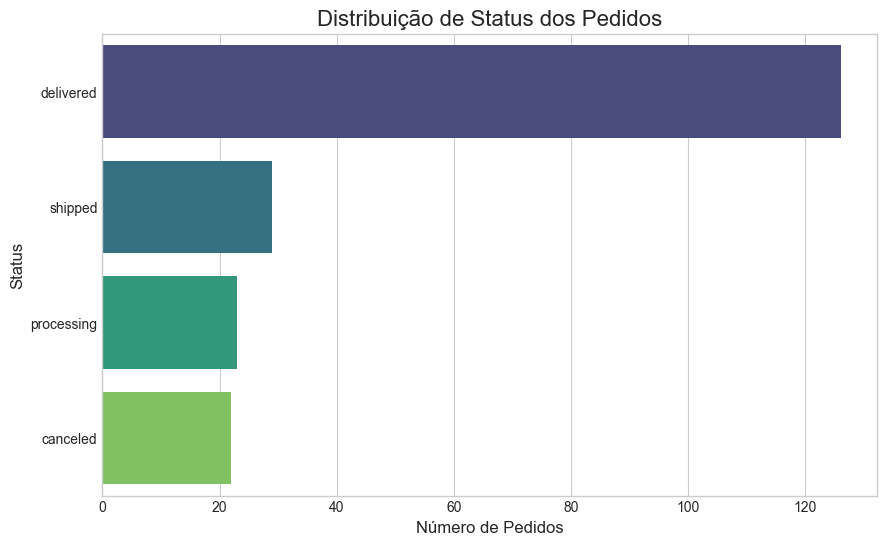

In [7]:
# Análise de status dos pedidos
plt.figure(figsize=(10, 6))
status_counts = orders['order_status'].value_counts()
sns.barplot(y=status_counts.index, x=status_counts.values, palette='viridis')
plt.title('Distribuição de Status dos Pedidos', fontsize=16)
plt.xlabel('Número de Pedidos', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.savefig('../reports/figures/order_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Preços e Fretes

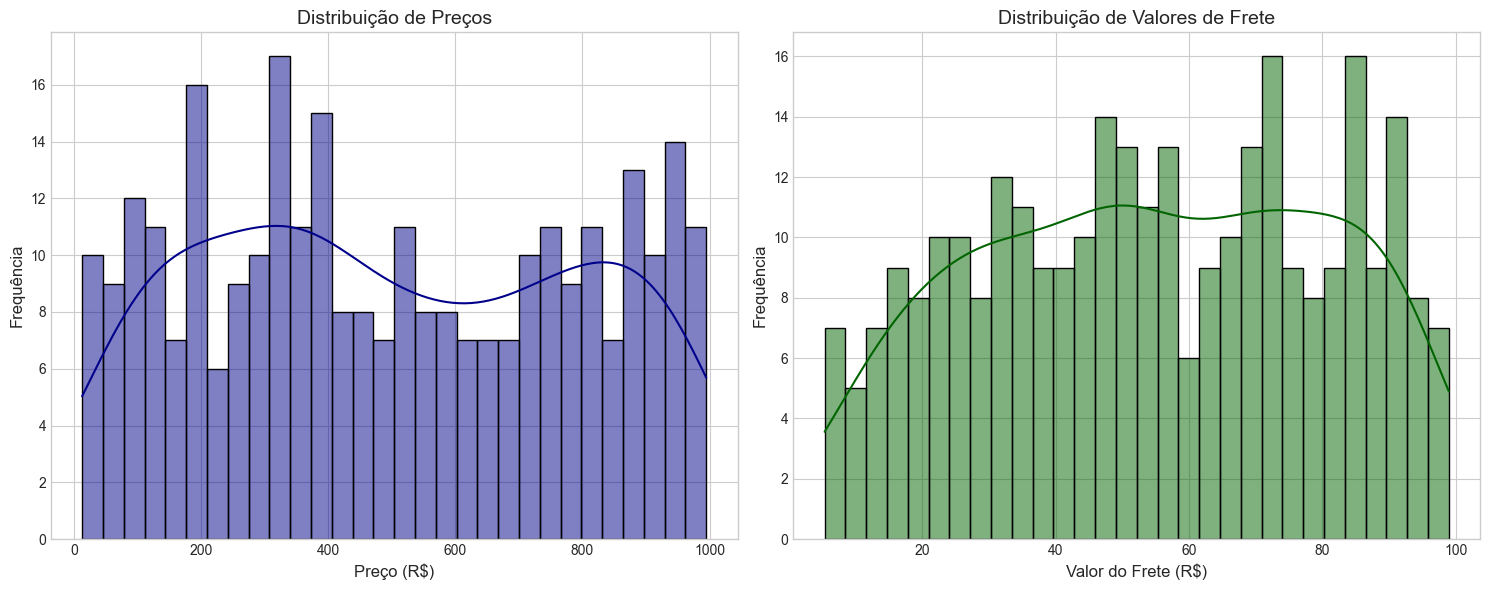

In [8]:
# Análise de preços e fretes
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(order_items['price'], kde=True, bins=30, color='darkblue')
plt.title('Distribuição de Preços', fontsize=14)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(order_items['freight_value'], kde=True, bins=30, color='darkgreen')
plt.title('Distribuição de Valores de Frete', fontsize=14)
plt.xlabel('Valor do Frete (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.savefig('../reports/figures/price_freight_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Categorias de Produtos

C:\Users\Douglas\AppData\Local\Temp\ipykernel_3556\2361187156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


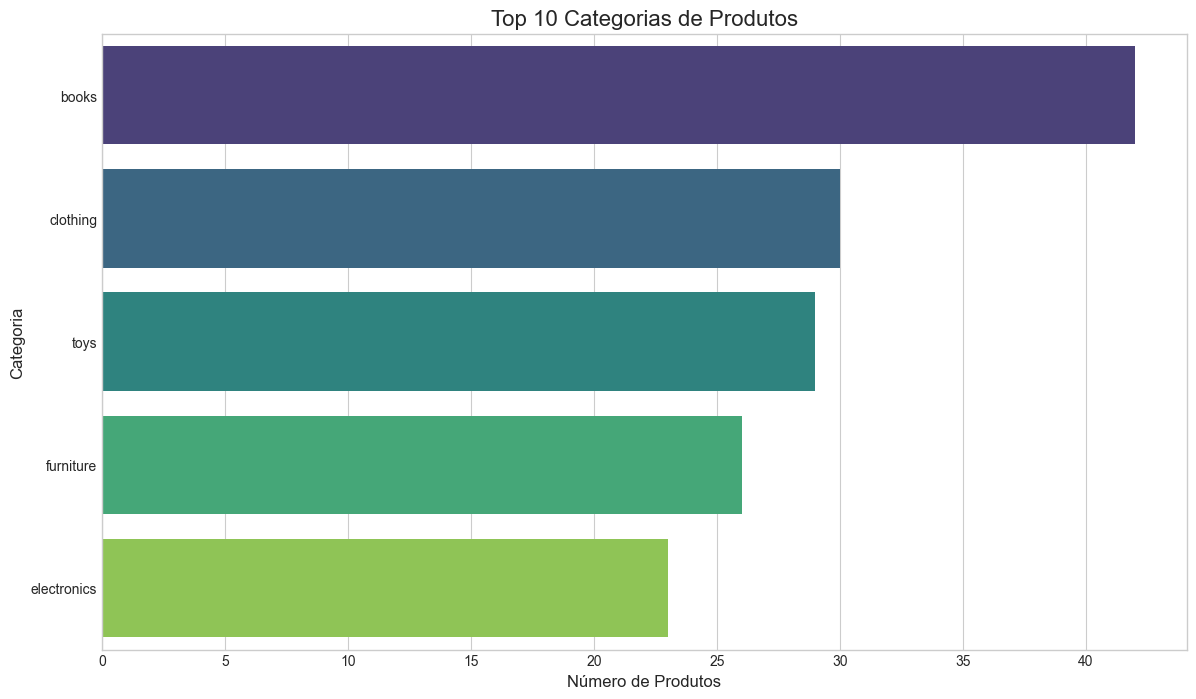

In [9]:
# Análise de categorias de produtos
plt.figure(figsize=(14, 8))
category_counts = products['product_category_name'].value_counts().head(10)
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Top 10 Categorias de Produtos', fontsize=16)
plt.xlabel('Número de Produtos', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.savefig('../reports/figures/top_product_categories.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise Geográfica

C:\Users\Douglas\AppData\Local\Temp\ipykernel_3556\1031215682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


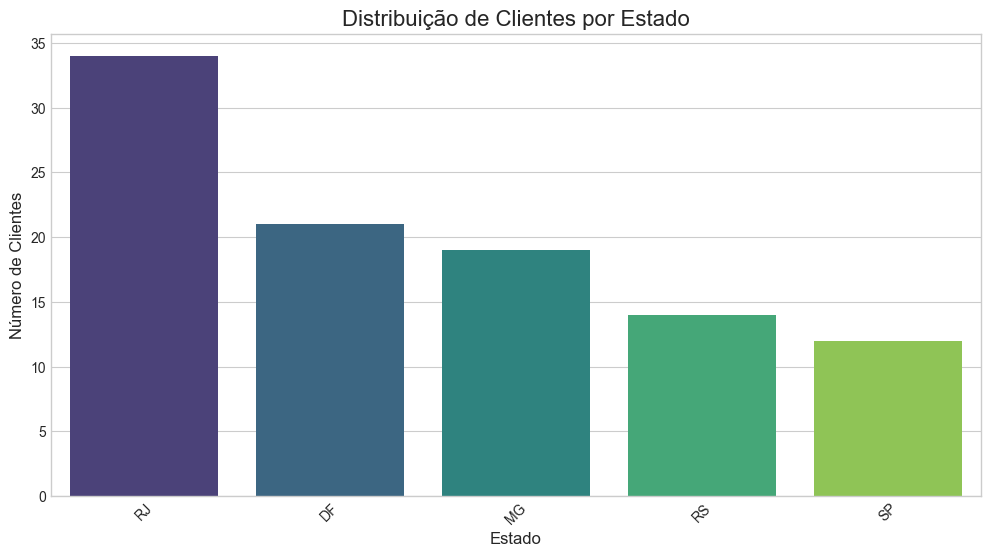

In [10]:
# Análise geográfica - Clientes por estado
plt.figure(figsize=(12, 6))
state_counts = customers['customer_state'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('../reports/figures/customers_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Vendedores

C:\Users\Douglas\AppData\Local\Temp\ipykernel_3556\2249717835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_state_counts.index, y=seller_state_counts.values, palette='viridis')


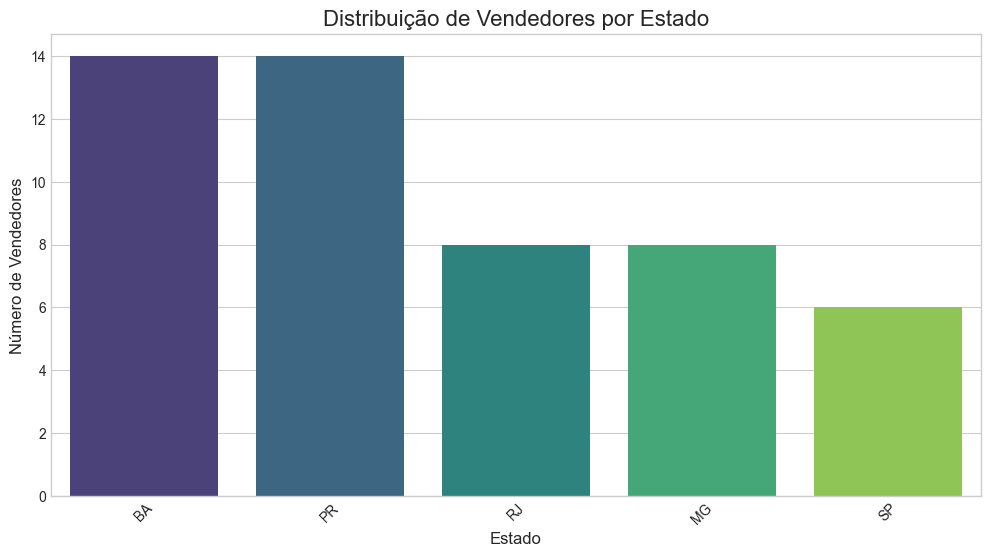

In [11]:
# Análise de vendedores por estado
plt.figure(figsize=(12, 6))
seller_state_counts = sellers['seller_state'].value_counts()
sns.barplot(x=seller_state_counts.index, y=seller_state_counts.values, palette='viridis')
plt.title('Distribuição de Vendedores por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Vendedores', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('../reports/figures/sellers_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Vendas por Categoria

C:\Users\Douglas\AppData\Local\Temp\ipykernel_3556\114174405.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='category', x='total_sales', data=sales_by_category, palette='viridis')


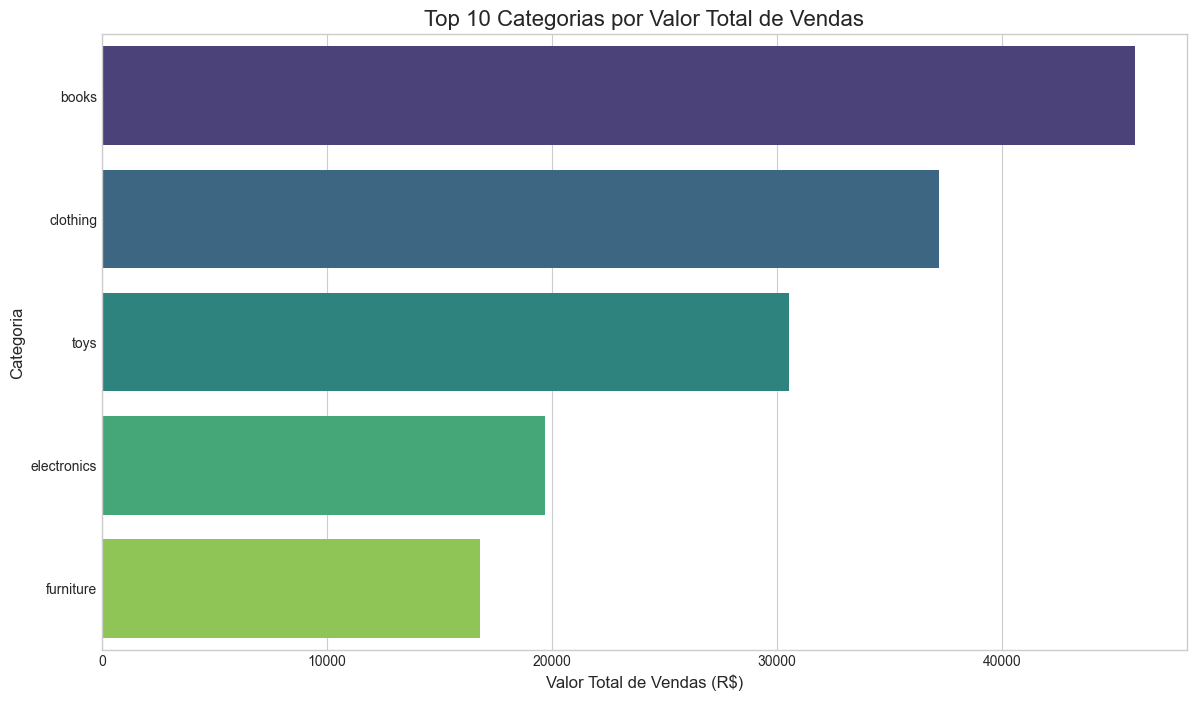

In [12]:
# Juntando dados de itens de pedido e produtos
order_items_products = pd.merge(order_items, products, on='product_id', how='left')

# Calculando vendas por categoria
sales_by_category = order_items_products.groupby('product_category_name')['price'].agg(['sum', 'count']).reset_index()
sales_by_category.columns = ['category', 'total_sales', 'order_count']
sales_by_category = sales_by_category.sort_values('total_sales', ascending=False).head(10)

# Visualizando vendas por categoria
plt.figure(figsize=(14, 8))
sns.barplot(y='category', x='total_sales', data=sales_by_category, palette='viridis')
plt.title('Top 10 Categorias por Valor Total de Vendas', fontsize=16)
plt.xlabel('Valor Total de Vendas (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.savefig('../reports/figures/sales_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

## Salvando Dados Processados

In [13]:
# Salvando dados processados para uso em outros notebooks
orders_processed = orders.copy()
os.makedirs('../data/processed', exist_ok=True)
orders_processed.to_csv('../data/processed/orders_processed.csv', index=False)

# Salvando dados de vendas por categoria
sales_by_category.to_csv('../data/processed/sales_by_category.csv', index=False)

print("Análise exploratória inicial concluída!")

Análise exploratória inicial concluída!


## Conclusões

Nesta análise exploratória inicial, identificamos vários padrões interessantes nos dados de e-commerce da Olist:

1. **Padrões Temporais**: Observamos variações significativas nas vendas por mês e dia da semana, com picos em determinados períodos.

2. **Status dos Pedidos**: A maioria dos pedidos está no status "entregue", indicando uma boa taxa de conclusão de vendas.

3. **Preços e Fretes**: A distribuição de preços mostra uma concentração em produtos de valor médio, enquanto os fretes têm uma distribuição mais uniforme.

4. **Categorias de Produtos**: Identificamos as categorias mais populares e as que geram maior receita.

5. **Distribuição Geográfica**: Clientes e vendedores estão concentrados em determinados estados, principalmente no Sudeste do Brasil.

Nos próximos notebooks, aprofundaremos a análise em aspectos específicos como comportamento do cliente, desempenho de vendas e análise geográfica mais detalhada.